In [1]:
import subprocess
import io

import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
res = subprocess.run(
    [
        "python3",
        "scan/00-examine_score.py",
        "/home/ubuntu/s3/genomes/hg38/hg38.fa",
        "/home/ubuntu/s3/jaspar_profile",
        "--output-dir",
        "./scan_results/NR3C1_hg38/",
        "--threads",
        "1",
        "--latest",
        "--taxon",
        "vertebrates",
        "--profile",
        "MA0113.3",
        "--pthresh",
        "1",
        "--rthresh",
        "0",
    ],
    stdout=subprocess.PIPE,
).stdout.decode("utf-8")


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.88it/s]


In [9]:
res

'2355,5.82e-11,100.00%\n2339,1.16e-10,99.84%\n2332,2.33e-10,99.78%\n2318,2.91e-10,99.64%\n2316,4.07e-10,99.62%\n2309,4.66e-10,99.55%\n2308,5.24e-10,99.54%\n2306,5.82e-10,99.52%\n2303,6.98e-10,99.49%\n2302,8.15e-10,99.48%\n2297,8.73e-10,99.43%\n2295,9.90e-10,99.41%\n2293,1.05e-09,99.40%\n2292,1.11e-09,99.39%\n2290,1.16e-09,99.37%\n2287,1.28e-09,99.34%\n2286,1.34e-09,99.33%\n2285,1.46e-09,99.32%\n2283,1.57e-09,99.30%\n2281,1.63e-09,99.28%\n2280,1.86e-09,99.27%\n2279,2.10e-09,99.26%\n2274,2.27e-09,99.21%\n2272,2.33e-09,99.19%\n2269,2.50e-09,99.16%\n2267,2.62e-09,99.14%\n2266,2.74e-09,99.13%\n2265,2.79e-09,99.12%\n2264,3.09e-09,99.11%\n2263,3.20e-09,99.10%\n2262,3.26e-09,99.09%\n2260,3.38e-09,99.07%\n2259,3.43e-09,99.06%\n2258,3.61e-09,99.05%\n2257,3.73e-09,99.04%\n2256,3.96e-09,99.03%\n2255,4.02e-09,99.02%\n2254,4.13e-09,99.01%\n2253,4.25e-09,99.01%\n2251,4.48e-09,98.99%\n2250,4.77e-09,98.98%\n2249,4.83e-09,98.97%\n2248,5.01e-09,98.96%\n2246,5.18e-09,98.94%\n2245,5.30e-09,98.93%\n2244,5.4

In [10]:
# load res into a dataframe

df = pd.read_csv(io.StringIO(res), names=["score", "pvalue", "rvalue"])

In [11]:
df.shape

(10139, 3)

In [12]:
df["rvalue"] = df["rvalue"].map(lambda x: float(x[:-1]))

<AxesSubplot: xlabel='pvalue', ylabel='rvalue'>

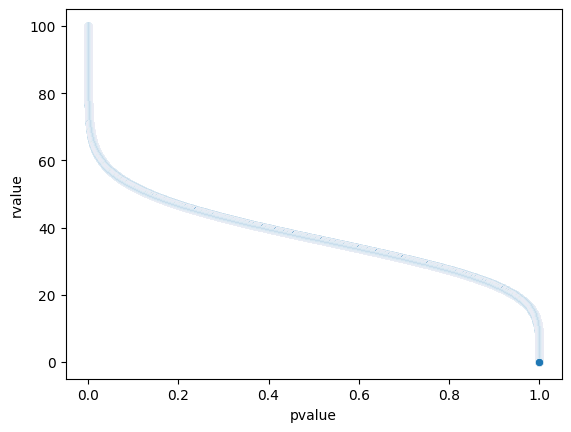

In [13]:
sns.scatterplot(data=df, x="pvalue", y="rvalue")

<AxesSubplot: xlabel='pvalue', ylabel='score'>

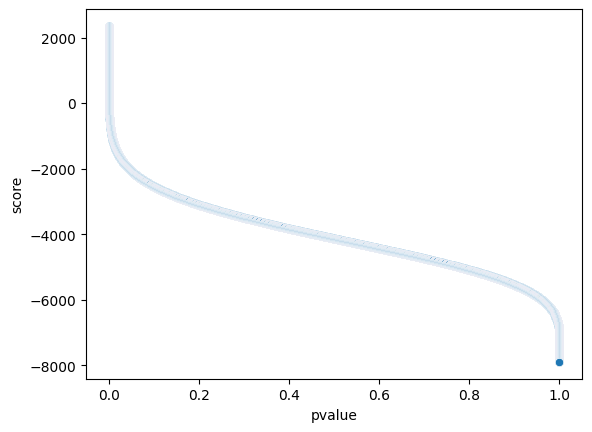

In [14]:
sns.scatterplot(data=df, x="pvalue", y="score")


<AxesSubplot: xlabel='rvalue', ylabel='score'>

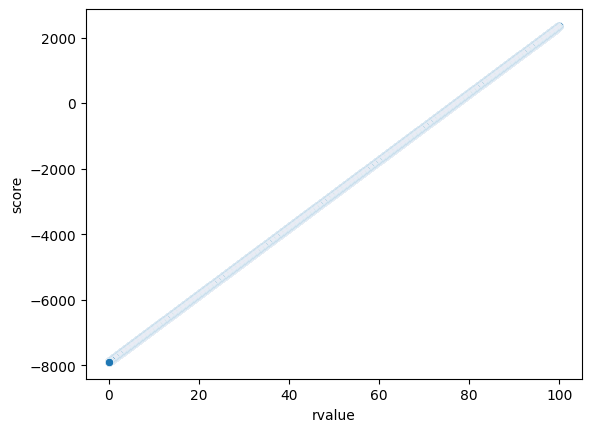

In [15]:
sns.scatterplot(data=df, x="rvalue", y="score")


<AxesSubplot: xlabel='-log10(pvalue)', ylabel='score'>

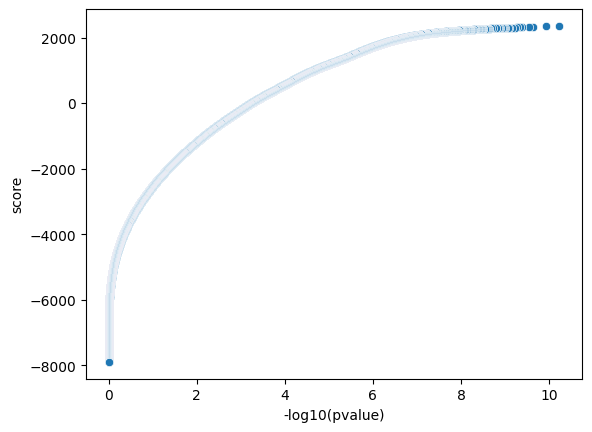

In [16]:
df["-log10(pvalue)"] = df["pvalue"].map(lambda x: -np.log10(x))
sns.scatterplot(data=df, x="-log10(pvalue)", y="score")

<AxesSubplot: xlabel='score', ylabel='score_sigmoid'>

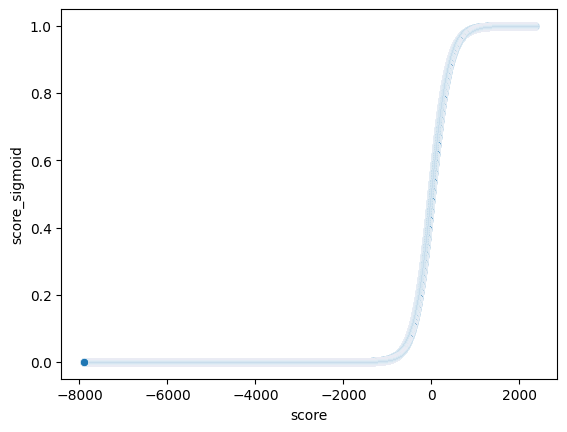

In [17]:
temperture = 200
df["score_sigmoid"] = df["score"].map(lambda x: 1 / (1 + np.exp(-x / temperture)))
sns.scatterplot(data=df, x="score", y="score_sigmoid")

In [51]:
default_jaspar_df = pd.read_table(
    "/home/ubuntu/project_comp/data_scan/hg38/NR3C1/MA0113.3.tsv",
    header=None,
    names=["chr", "start", "end", "tf", "score", "pvalue", "strand"],
)


In [52]:
default_jaspar_df

,chr,start,end,tf,score,pvalue,strand
0,chr1,17443,17460,NR3C1,807,374,+
1,chr1,17443,17460,NR3C1,813,382,-
2,chr1,19009,19026,NR3C1,824,398,+
3,chr1,19009,19026,NR3C1,824,398,-
4,chr1,32238,32255,NR3C1,826,401,+
...,...,...,...,...,...,...,...
1168024,chrY_KI270740v1_random,1195,1212,NR3C1,812,381,-
1168025,chrY_KI270740v1_random,2618,2635,NR3C1,807,374,+
1168026,chrY_KI270740v1_random,9744,9761,NR3C1,804,370,+
1168027,chrY_KI270740v1_random,15508,15525,NR3C1,804,370,+


In [28]:
default_jaspar_df.score.max(), default_jaspar_df.score.min()

(997, 800)

<AxesSubplot: xlabel='5', ylabel='4'>

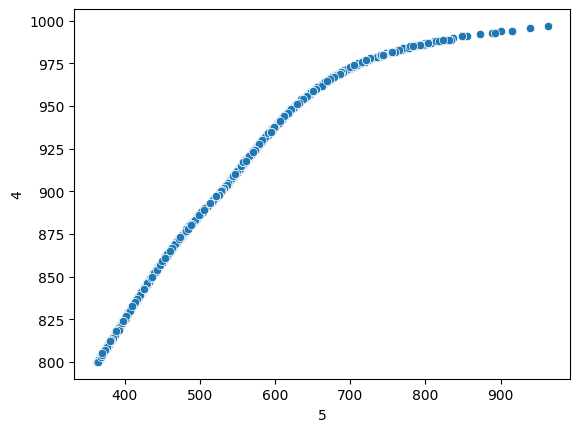

In [26]:
sns.scatterplot(data=default_jaspar_df, x="pvalue", y="score")

<AxesSubplot: xlabel='5', ylabel='4'>

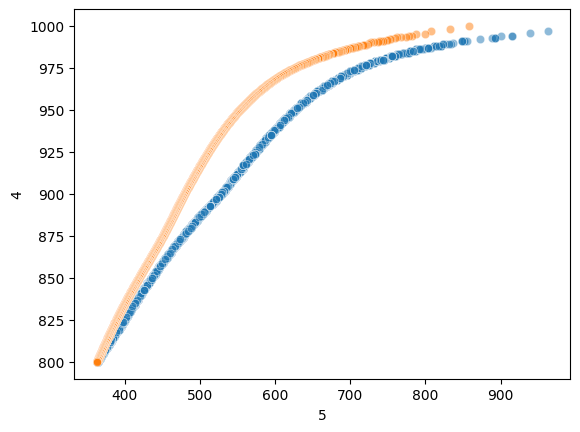

In [40]:
ax = sns.scatterplot(x=default_jaspar_df[5], y=default_jaspar_df[4], alpha=0.5)
df_sub = df.query("score >= 800")
# noramlize score to [800, 1000]
score_normalized = (df_sub["score"] - 800) / (df_sub["score"].max() - 800) * 200 + 800
# align pvalue to jaspar
p_norm_factor = default_jaspar_df[5].min() / (df_sub["-log10(pvalue)"].min() * 100)
sns.scatterplot(x=df_sub["-log10(pvalue)"] * 100 * p_norm_factor, y=score_normalized, ax=ax, alpha=0.5)

In [54]:
default_jaspar_df.pvalue.min()

363

In [41]:
pos = np.load("/home/ubuntu/project_comp/data_scan/hg38/NR3C1/MA0113.3.17.-7898.2355.+.npz")

In [43]:
argmax_on_chr10 = pos["chr10"].argmax()
max_on_chr10 = pos["chr10"][argmax_on_chr10]

In [44]:
argmax_on_chr10, max_on_chr10

(31681880, 2290)

In [56]:
default_jaspar_df.query("chr == 'chr10' and strand == '+'").sort_values("score", ascending=False)

,chr,start,end,tf,score,pvalue,strand
104296,chr10,31681872,31681889,NR3C1,993,893,+
104702,chr10,32728201,32728218,NR3C1,984,772,+
116700,chr10,64398522,64398539,NR3C1,983,765,+
96153,chr10,11039699,11039716,NR3C1,982,754,+
110205,chr10,48293096,48293113,NR3C1,982,759,+
...,...,...,...,...,...,...,...
125706,chr10,86731628,86731645,NR3C1,800,364,+
98161,chr10,16080244,16080261,NR3C1,800,363,+
106650,chr10,37532499,37532516,NR3C1,800,363,+
106677,chr10,37610631,37610648,NR3C1,800,363,+


In [61]:
default_jaspar_df.chr.value_counts().index.tolist()

['chr2',
 'chr1',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chrX',
 'chr8',
 'chr10',
 'chr11',
 'chr12',
 'chr9',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr18',
 'chr17',
 'chr20',
 'chr19',
 'chr21',
 'chr22',
 'chrY',
 'chr16_KI270728v1_random',
 'chr15_KI270727v1_random',
 'chr17_KI270729v1_random',
 'chrUn_GL000216v2',
 'chrUn_KI270442v1',
 'chr14_GL000194v1_random',
 'chrUn_GL000195v1',
 'chr9_KI270719v1_random',
 'chrUn_GL000213v1',
 'chr17_KI270730v1_random',
 'chr22_KI270734v1_random',
 'chrUn_KI270744v1',
 'chrUn_KI270743v1',
 'chr22_KI270731v1_random',
 'chr17_GL000205v2_random',
 'chr4_GL000008v2_random',
 'chr14_GL000009v2_random',
 'chrUn_GL000219v1',
 'chr1_KI270706v1_random',
 'chrUn_KI270750v1',
 'chr14_KI270725v1_random',
 'chrUn_KI270741v1',
 'chr14_KI270722v1_random',
 'chrUn_KI270756v1',
 'chr1_KI270712v1_random',
 'chrUn_KI270751v1',
 'chrUn_KI270742v1',
 'chr14_GL000225v1_random',
 'chrUn_GL000224v1',
 'chr22_KI270737v1_random',
 'chrUn_GL000218v1',
 'chr